In [1]:
!pip install face_recognition

In [2]:
!apt update
!apt install -y cmake
!pip install dlib

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:7 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:12 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease
Hit:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Reading package lists... Done
Building dependency tree       
Reading state information... Done
53 packages can be upgraded. Run 'ap

In [3]:
import numpy as np
import cv2
import os,glob
import face_recognition
from datetime import datetime

In [4]:
path='/content/Attendancesystem'
images=[]
classnames=[]
os.chdir(path)
myList = []
for file in glob.glob('*.jpg'):
    myList.append(file)
print(myList)

['obama.jpg', 'modi.jpg', 'arvind.jpg']


In [5]:
for i in myList:
  curimg=cv2.imread(f'{path}/{i}')
  images.append(curimg)
  classnames.append(os.path.splitext(i)[0])
print(classnames)

['obama', 'modi', 'arvind']


In [8]:
def findencoding(images):
  encodelist=[]
  for img in images:
    img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    encode=face_recognition.face_encodings(img)[0]
    encodelist.append(encode)
  return encodelist
encodelistknown=findencoding(images)
print(encodelistknown)

[array([-7.89855272e-02,  1.19325742e-01,  7.74601027e-02, -5.42928018e-02,
       -2.20939517e-04,  1.48251001e-03, -1.24565512e-01, -6.62226230e-02,
        1.82258323e-01, -1.56667590e-01,  2.60375708e-01,  9.12739709e-02,
       -2.16396973e-01, -1.26712203e-01,  5.87846823e-02,  1.40852392e-01,
       -2.31286213e-01, -8.45486820e-02, -1.09068789e-01, -5.70118055e-02,
       -1.05618462e-02,  1.09915212e-02,  9.25919637e-02,  4.08976376e-02,
       -8.11864883e-02, -3.95336092e-01, -7.63197765e-02, -1.36484981e-01,
       -3.09942849e-03, -1.96083367e-01, -9.33996066e-02, -9.52848513e-03,
       -1.63950980e-01, -8.87200981e-02, -2.22247783e-02,  7.47292489e-03,
       -1.49014522e-04, -4.48202714e-03,  1.87865704e-01,  6.11611754e-02,
       -1.39598668e-01,  6.60675168e-02, -9.26260278e-03,  2.42261022e-01,
        2.53262341e-01,  1.04640827e-01,  2.50969641e-02, -6.12618588e-02,
        1.37111634e-01, -2.13000283e-01,  6.06301129e-02,  1.69333249e-01,
        8.63299519e-02, 

In [9]:
def markAttendance(name):
  with open('/content/Attendance.csv','r+') as f:
    mydatalist=f.readlines()
    namelist=[]
    for line in mydatalist:
      entry=line.split(',')
      namelist.append(entry[0])
    if name not in namelist:
      now=datetime.now()
      dtstring=now.strftime('%H:%M:%S')
      f.writelines(f'\n{name},{dtstring}')

In [10]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
from google.colab.patches import cv2_imshow
import time

def take_photo(filename='photo.jpg', quality=0.5):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

cap=take_photo()

time.sleep(6)

p=f'{path}/photo.jpg'



def read_img(p):
  img=cv2.imread(p)
  (h,w)=img.shape[:2]
  width=500
  ratio=width/float(w)
  height=int(h*ratio)
  return cv2.resize(img, (width, height))

imgs=read_img(p)
imgs=cv2.cvtColor(imgs, cv2.COLOR_BGR2RGB)

facescurrframe=face_recognition.face_locations(imgs)
encodecurrframe=face_recognition.face_encodings(imgs,facescurrframe)

for encodeface,faceloc in zip(encodecurrframe, facescurrframe):
  matches=face_recognition.compare_faces(encodelistknown, encodeface)
  facedistance=face_recognition.face_distance(encodelistknown, encodeface)
  print(facedistance)
  
  matchIndex=np.argmin(facedistance)
  if matches[matchIndex]:
    name=classnames[matchIndex].upper()
    print(name)

    from google.colab.patches import cv2_imshow
    img=cv2.imread(p)
    y1,x2,y2,x1=faceloc
    cv2.rectangle(img,(x1,y1),(x2,y2),(0,255,0),2)
    cv2.rectangle(img,(x1,y2-35),(x2,y2),(0,255,0),cv2.FILLED)

    font = cv2.FONT_HERSHEY_SIMPLEX
    position = (x1+6,y2-6)
    fontScale = 1
    fontColor = (0,0,0)
    lineType = 2

    cv2.putText(img,name, position, font, fontScale,fontColor,lineType)
    markAttendance(name)
 

<IPython.core.display.Javascript object>

[0.33347795 0.61903504 0.72251322]
OBAMA


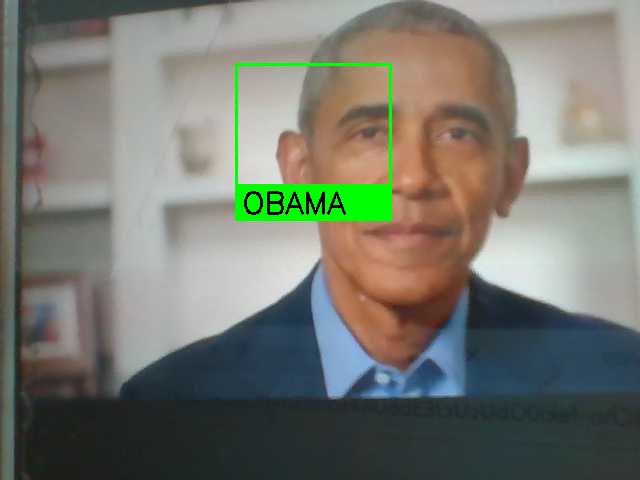

In [11]:
cv2_imshow(img)
